# PR HW4

## SVM

### Part 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [82]:
x = np.random.uniform(0, 10, 100)
y = np.random.uniform(0, 10, 100)
label = [1 if i < 2 * j + 3 else 0 for i, j in zip(x, y)]
df = pd.DataFrame({"x": x, "y": y, "label": label})
df

,x,y,label
0,0.619328,3.035275,1
1,8.586357,3.377745,1
2,9.016382,8.404094,1
3,6.498819,4.857102,1
4,7.459800,2.676729,1
...,...,...,...
95,9.045424,7.464514,1
96,3.206875,3.435450,1
97,4.656320,5.100043,1
98,2.975145,2.595721,1


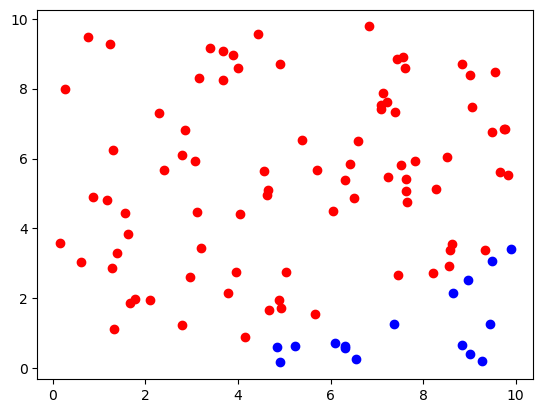

In [83]:
plt.scatter(df[df["label"] == 1]["x"], df[df["label"] == 1]["y"], color="red")
plt.scatter(df[df["label"] == 0]["x"], df[df["label"] == 0]["y"], color="blue")
plt.show()

### Part 2

In [84]:
class SVM:
    def __init__(self, C=1.0):
        self.w = None
        self.b = None
        self.C = C

    def fit(self, X, y, learning_rate=0.001, epochs=1000):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        y = [1 if i == 1 else -1 for i in y]

        for e in range(epochs):
            for i in range(n_samples):
                if y[i] * (np.dot(X[i], self.w) - self.b) >= 1:
                    self.w -= learning_rate * (2 * 1/n_samples * self.w)
                else:
                    self.w -= learning_rate * (2 * 1/n_samples * self.w - self.C * np.dot(X[i], y[i]))
                    self.b -= learning_rate * self.C * y[i]

    def predict(self, X):
        return np.sign(np.dot(X, self.w) - self.b)

In [85]:
X = df[["x", "y"]].values
y = df["label"].values
svm = SVM()
svm.fit(X, y)
svm.w, svm.b

(array([-0.57944748,  1.39755572]), -1.3759999999999593)

In [86]:
def plot_svm(svm, X, y):
    w = svm.w
    b = svm.b
    x0 = np.linspace(0, 10, 100)
    x1 = -w[0]/w[1] * x0 - b/w[1]
    margin = 1 / np.sqrt(np.sum(w**2))
    x1_margin_pos = x1 + margin / np.sqrt(1 + (w[0]/w[1])**2)
    x1_margin_neg = x1 - margin / np.sqrt(1 + (w[0]/w[1])**2)

    plt.plot(x0, x1, 'k-')
    plt.plot(x0, x1_margin_pos, 'k--')
    plt.plot(x0, x1_margin_neg, 'k--')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red')
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue')
    plt.show()

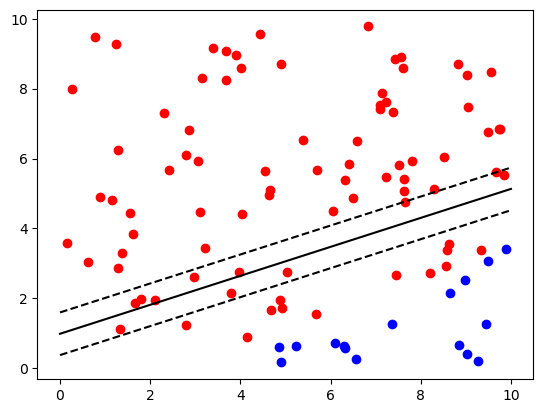

In [87]:
plot_svm(svm, X, y)

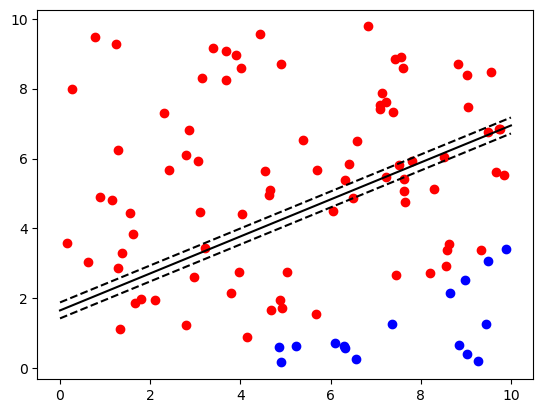

In [88]:
svm_2 = SVM(C=10)
svm_2.fit(X, y)
plot_svm(svm_2, X, y)

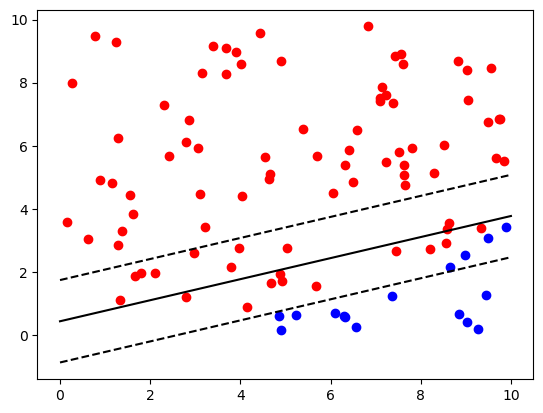

In [89]:
svm_3 = SVM(C=0.1)
svm_3.fit(X, y)
plot_svm(svm_3, X, y)

### Part 3

In [96]:
class SVM:
    def __init__(self, weight=1.0, C=1.0):
        self.w = None
        self.b = None
        self.C = C
        self.weight = weight

    def fit(self, X, y, learning_rate=0.001, epochs=1000):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        y = [1 if i == 1 else -1 for i in y]

        for e in range(epochs):
            for i in range(n_samples):
                wg = self.weight if y[i] == 1 else 1
                if y[i] * (np.dot(X[i], self.w) - self.b) >= 1:
                    self.w -= learning_rate * (2 * 1/n_samples * self.w)
                else:
                    self.w -= learning_rate * (2 * 1/n_samples * self.w - self.C * wg * np.dot(X[i], y[i]))
                    self.b -= learning_rate * self.C * wg * y[i]

    def predict(self, X):
        return np.sign(np.dot(X, self.w) - self.b)

    def decision_function(self, X):
        return np.dot(X, self.w) - self.b



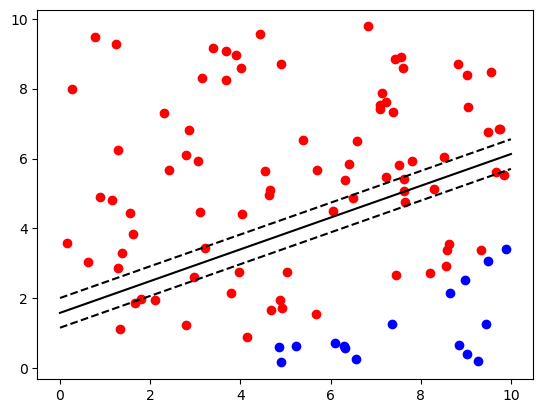

In [97]:
svm_4 = SVM(weight=10)
svm_4.fit(X, y)
plot_svm(svm_4, X, y)

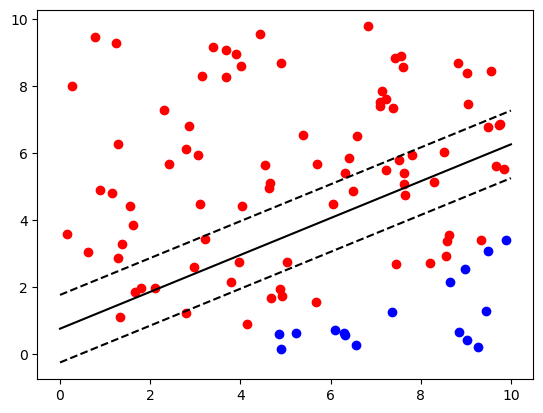

In [98]:
svm_5 = SVM(weight=0.1)
svm_5.fit(X, y)
plot_svm(svm_5, X, y)

In [101]:
def plot_svm_with_weighted_margins(X, y, clf):
    plt.figure(figsize=(8, 6))

    # Plot data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7)

    # Get axis limits
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate the model
    xx = np.linspace(xlim[0], xlim[1], 50)
    yy = np.linspace(ylim[0], ylim[1], 50)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # Plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.7, linestyles=['--', '-', '--'])

    # Highlight support vectors
    support_vectors_idx = np.where((y * clf.decision_function(X)) <= 1)[0]
    plt.scatter(X[support_vectors_idx, 0], X[support_vectors_idx, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')

    plt.title(f"SVM Decision Boundary with Weighted Margins (Class Weight={clf.weight})")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()


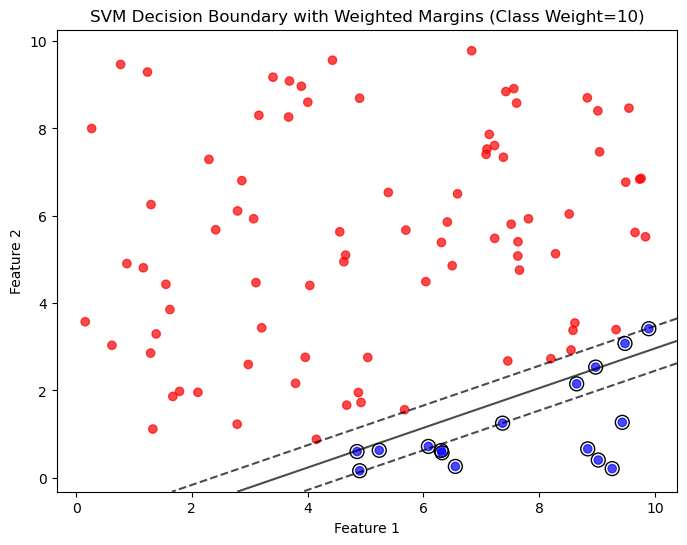

In [102]:
plot_svm_with_weighted_margins(X, y, svm_4)